For more info about the dataset, please check it out: https://towardsdatascience.com/counsel-chat-bootstrapping-high-quality-therapy-data-971b419f33da

In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = joblib.load("data/result.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   question         865 non-null    object 
 1   topic            866 non-null    object 
 2   sentimental      866 non-null    int64  
 3   mentbert_label   866 non-null    object 
 4   mentbert_score   866 non-null    float64
 5   psychbert_label  866 non-null    object 
 6   psychbert_score  866 non-null    float64
 7   fear             865 non-null    float64
 8   sadness          865 non-null    float64
 9   neutral          865 non-null    float64
 10  joy              865 non-null    float64
 11  surprise         865 non-null    float64
 12  anger            865 non-null    float64
 13  disgust          865 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 94.8+ KB


In [4]:
# df.iloc[113].psychbert_label

In [5]:
df.topic = df.topic.astype("category")
df.mentbert_label = df.mentbert_label.astype("category")
df.psychbert_label = df.psychbert_label.astype("category")

In [6]:
for topic in df.topic.unique():
    print(topic)

depression

anxiety
parenting
self-esteem
relationship-dissolution
workplace-relationships
spirituality
trauma
domestic-violence
anger-management
sleep-improvement
intimacy
grief-and-loss
substance-abuse
family-conflict
marriage
eating-disorders
relationships
lgbtq
behavioral-change
addiction
legal-regulatory
professional-ethics
stress
human-sexuality
social-relationships
children-adolescents
military-issues
diagnosis
counseling-fundamentals


In [7]:
df_depression = df[df.topic == "depression"]
df_depression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 137
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   question         137 non-null    object  
 1   topic            137 non-null    category
 2   sentimental      137 non-null    int64   
 3   mentbert_label   137 non-null    category
 4   mentbert_score   137 non-null    float64 
 5   psychbert_label  137 non-null    category
 6   psychbert_score  137 non-null    float64 
 7   fear             137 non-null    float64 
 8   sadness          137 non-null    float64 
 9   neutral          137 non-null    float64 
 10  joy              137 non-null    float64 
 11  surprise         137 non-null    float64 
 12  anger            137 non-null    float64 
 13  disgust          137 non-null    float64 
dtypes: category(3), float64(9), int64(1), object(1)
memory usage: 15.2+ KB


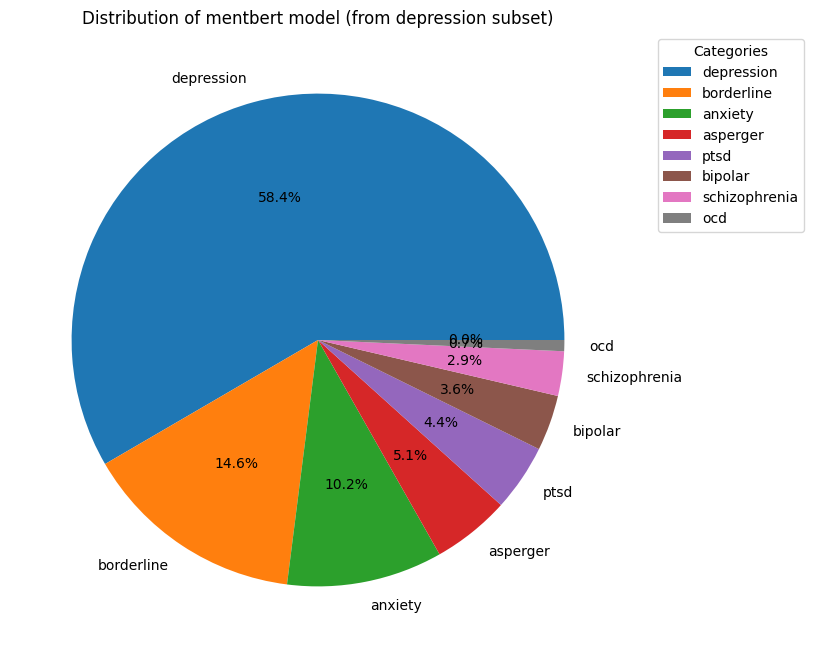

In [8]:
def show_pizza_chart(se: pd.Series, title) -> None:
    category_counts = se.value_counts()
    
    # Plot as a pie chart
    category_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
    
    plt.ylabel('')  # Remove the y-label
    plt.title(title)
    plt.legend(title="Categories", loc="upper right", bbox_to_anchor=(1.3, 1))
    plt.show()

show_pizza_chart(
    df_depression['mentbert_label'],
    'Distribution of mentbert model (from depression subset)'
)

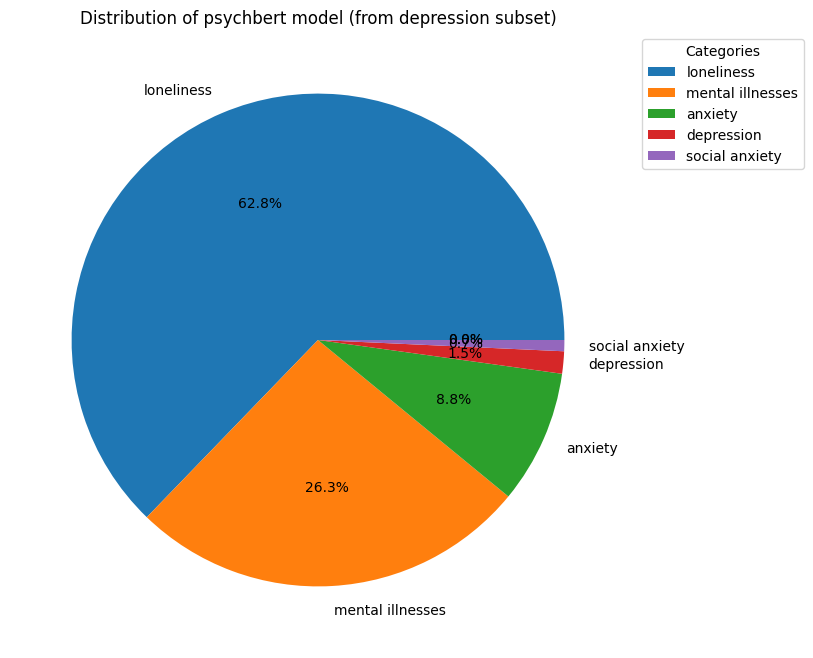

In [9]:
show_pizza_chart(
    df_depression['psychbert_label'],
    'Distribution of psychbert model (from depression subset)'
)

In [10]:
df_anxiety = df[df.topic == "anxiety"]
df_anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 138 to 237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   question         100 non-null    object  
 1   topic            100 non-null    category
 2   sentimental      100 non-null    int64   
 3   mentbert_label   100 non-null    category
 4   mentbert_score   100 non-null    float64 
 5   psychbert_label  100 non-null    category
 6   psychbert_score  100 non-null    float64 
 7   fear             100 non-null    float64 
 8   sadness          100 non-null    float64 
 9   neutral          100 non-null    float64 
 10  joy              100 non-null    float64 
 11  surprise         100 non-null    float64 
 12  anger            100 non-null    float64 
 13  disgust          100 non-null    float64 
dtypes: category(3), float64(9), int64(1), object(1)
memory usage: 11.7+ KB


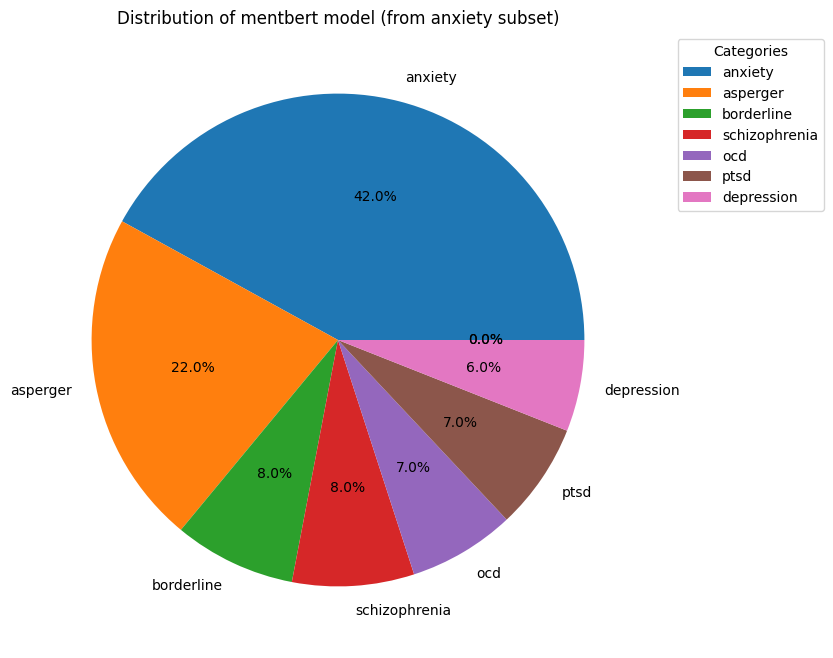

In [11]:
show_pizza_chart(
    df_anxiety['mentbert_label'],
    'Distribution of mentbert model (from anxiety subset)'
)

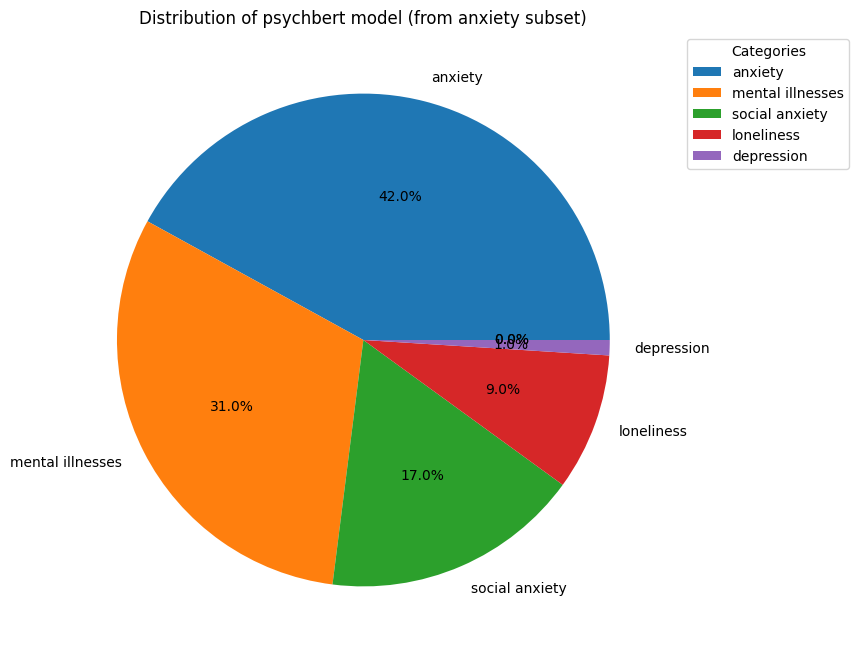

In [12]:
show_pizza_chart(
    df_anxiety['psychbert_label'],
    'Distribution of psychbert model (from anxiety subset)'
)

In [13]:
df_anxiety[df_anxiety.mentbert_label == "asperger"].iloc[0].question

'When I get frustrated or upset, it becomes extremely difficult to keep my voice down. I also instantly cry and tend to have anxiety attacks. What can I do to try and control it?'

In [25]:
print(df_anxiety[df_anxiety.mentbert_label == "borderline"].iloc[7].question)

I feel that I need to end my present relationship. He lives three hours away and likes the reassurance of having someone to talk to multiple times per day and seeing me once or twice a month. I want someone who is more present and more of a life companion. Lately, he has had a very busy work schedule and I have only seen him a few times in the last 6 weeks. I told him that I can't continue in this way because I constantly feel frustrated and angry and that he is not making the relationship enough of a priority. I also feel it is keeping me from possibly finding the relationship I want. We have been together 7 years. The problem is that I panic and experience anxiety and depression thinking of him with someone else and then thinking I will never meet someone I like. We have gone through this cycle already 4-5 times and I feel it is unhealthy to stay in it, but my aversion to the anxiety and depression I experience upon separation always leads me to reconcile.
